[3008.0037018181997, 114.78243643557887, 799.7332833143394, 114.78243643557887, 1.32842766427807, 0.33027660451964763]


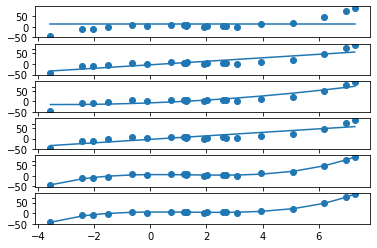

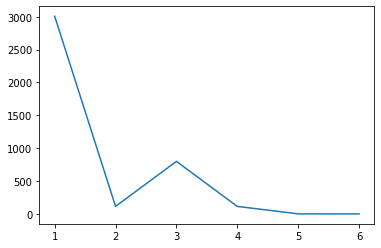

In [16]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
# producing X and Y matrixes 
def produce_X(scale,size,mean):
    X=np.zeros((size,1))
    for i in range(size):
        X[i] = 2 - 3 * random.normal(mean , size = 1 , scale = scale)
    x_t=np.sort(np.transpose(X))
    return np.transpose(x_t)
def produce_Y(mean , size , scale , X):
    Y= np.zeros(size)
    for i in range(size):
        Y[i] = 10 - 2 * X[i][0]**2 + 0.5 * X[i][0]**3 + random.normal(mean , size = 1 , scale = scale)
    return np.transpose([Y])
size = 20
# Make a function for estimate Y
def estimate_Y(X,Y):
    A = np.linalg.inv(np.transpose(X) @ X)
    b = A @ (np.transpose(X) @ Y)
    y = X @ b 
    return y
def produce_A(k , size , X):
    A=np.zeros((size , k))
    for i in range(k):
        for j in range(size):
            A[j][i] = (X[j][0])**i
    return A
def estimate_Error(y,Y):
    error = 0
    for i in range(np.shape(Y)[1]):
        error = error + (Y[i][0] - y[i][0])**2
    return error
X = produce_X(1 , 20 , 0)
Y = produce_Y(-3 , 20 , 3 , X)
A = [produce_A(k=1,size=size,X=X) , produce_A(k=2,size=size,X=X) ,produce_A(k=3,size=size,X=X),produce_A(k=4,size=size,X=X) , produce_A(k=5,size=size,X=X) , produce_A(k=6,size=size,X=X)]
y = [estimate_Y(A[0],Y), estimate_Y(A[1],Y) , estimate_Y(A[2],Y) ,estimate_Y(A[1],Y) , estimate_Y(A[4],Y), estimate_Y(A[5],Y)]
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6)
ax1.plot(X,y[0]);ax1.scatter(X,Y)
ax2.plot(X,y[1]);ax2.scatter(X,Y)
ax3.plot(X,y[2]);ax3.scatter(X,Y)
ax4.plot(X,y[3]);ax4.scatter(X,Y)
ax5.plot(X,y[4]);ax5.scatter(X,Y)
ax6.plot(X,y[5]);ax6.scatter(X,Y)
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
Error = [estimate_Error(y[0],Y) , estimate_Error(y[1],Y) , estimate_Error(y[2],Y) , estimate_Error(y[3],Y) , estimate_Error(y[4],Y) , estimate_Error(y[5],Y)]
print(Error)
x = np.linspace(1,6,6)
plt.show()
plt.plot(x,Error)
plt.show()